# [실습] 단변량분석 종합실습

## 0.환경준비

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 변수

## 보스톤 집값 데이터

![](https://ichi.pro/assets/images/max/724/0*3r3cqJ3Q875mQXVV)

|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn2	|	25,000 평방피트를 초과 거주지역 비율 (범주: 0-하, 1-중, 2-상)	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


In [2]:
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


### ① crim

In [3]:
var= 'crim'

1) 변수의 비즈니스 의미

> 타운별 범죄율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [4]:
boston[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [5]:
boston[var].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

5) 분포 확인(시각화)

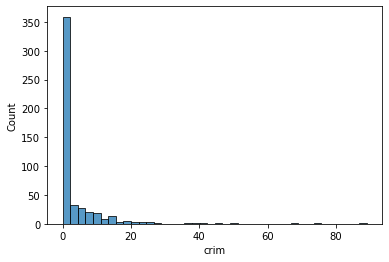

In [6]:
sns.histplot(boston[var], bins = 40)
plt.show()

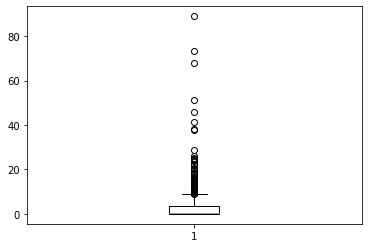

[0.082045 0.00632 ]
[3.6770825 8.98296  ]


In [7]:
box = plt.boxplot(boston[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분(75%의 타운)의 범죄율이 3.6% 이하  
* boxlplot 기준으로 볼 때, 약 9% 이상은 이상치로 검토
* 대부분의 타운은 치안 관리가 잘 되는 것 같으나, 9% 이상의 범죄율 지역은 치안상태, 외곽지역, 슬럼가/빈곤층 밀집 지역 등인지 확인이 필요하다.

7) 추가 분석해 볼 사항이 있나요?

> * 범죄율을 9% 이상과 이하로 나누고(범주화), 이상인 지역과 이하의 지역에 대한 다른 변수의 차이를 비교해 본다.

### ② ptratio

In [8]:
boston.head(3)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0


1) 변수의 비즈니스 의미

> 학생, 교사 비율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [9]:
boston['ptratio'].isnull().sum()

0

4) 기초통계량(수치화)

In [12]:
# print(boston['ptratio'].value_counts())
print(boston['ptratio'].describe())

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


5) 분포 확인(시각화)

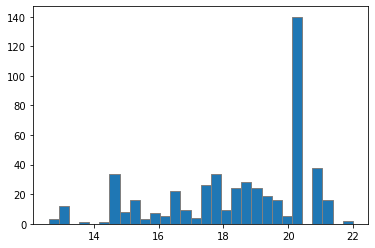

In [17]:
plt.hist(boston['ptratio'], bins=30,edgecolor='grey')
plt.show()

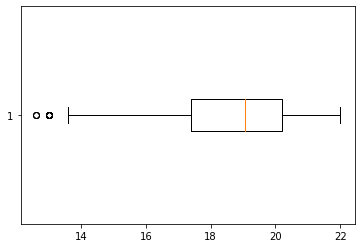

[17.4 13.6]
[20.2 22. ]


In [34]:
box = plt.boxplot(boston['ptratio'], vert=False)
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 약 19%의 비율이 앞도적으로 높다.  
> 14% 미만의 이상치가 존재한다.
 - 평균과 중간값이 비슷한 수치를 보인다. 
 - 대부분 비슷한 수치를 가진다.
 - 그러나 낮은 비율이 적지않게 보인다.
     > 교육율이 낮은 지역이 존재한다는 것으로 보인다.

7) 추가 분석해 볼 사항이 있나요?

- 범죄율과 교육율의 상관관계가 있을까?

### ③ lstat

In [20]:
boston.head(3)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0


1) 변수의 비즈니스 의미

> 인구 중 하위 계층 비율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무

In [21]:
boston['lstat'].isnull().sum()

0

4) 기초통계량(수치화)

In [24]:
boston['lstat'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

5) 분포 확인(시각화)

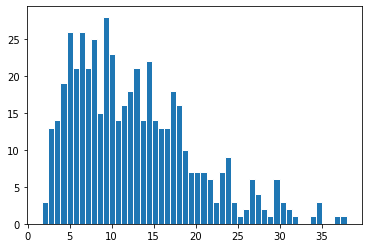

In [26]:
plt.hist(boston['lstat'], bins=50, edgecolor='w')
plt.show()

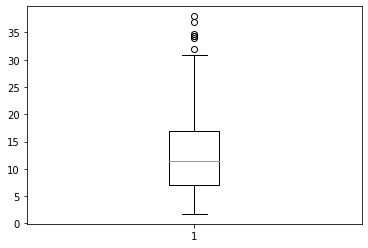

[6.95 1.73]
[16.955 30.81 ]


In [35]:
box = plt.boxplot(boston['lstat'])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 평균 12.65 / 중간값 11.36  
> 10 주변에 많은 분포를 보인다.  
> 높은 수치의 이상값도 적지 않게 보인다.  

- 전체적으로 인구 하위계층이 전체 인구에서 높지 않은 비율을 보인다.
- 도시가 부유한 편에 속한다 할 수 있다.

7) 추가 분석해 볼 사항이 있나요?

> 전체적으로 부유한 도시인데 범죄율이 높고, 교육율이 낮은 이유가 무엇인지 찾아볼 만하다.  
> 범죄, 인구, 교육율 비율을 통해 지역이 모이는 곳을 분석해볼 필요가 있어보인다.

### ④ medv

In [28]:
boston.head(3)

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0


1) 변수의 비즈니스 의미

> 타운별 집값(중위수)

2) 숫자, 범주?

> 숫자형

3) NaN 존재 유무

In [29]:
boston['medv'].isnull().sum()

0

4) 기초통계량(수치화)

In [30]:
boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

5) 분포 확인(시각화)

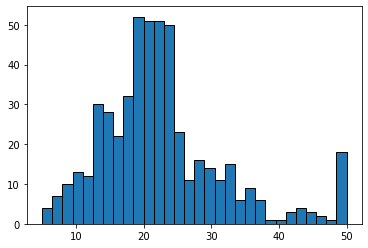

In [89]:
plt.hist(boston['medv'], bins=30, edgecolor='k')
plt.show()

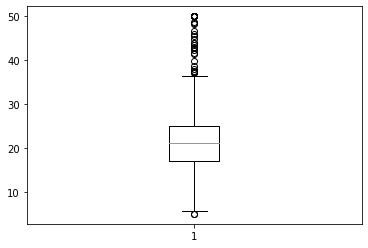

In [36]:
plt.boxplot(boston['medv'])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 평균 22.53 / 중간값 21.2  
> 높은 이상치 값이 많이 보임.
- 부촌 지역의 유무를 확인할 수 있음.

7) 추가 분석해 볼 사항이 있나요?

- 집값이 높은 지역의 범죄율, 교육율, 하위 계층 비율을 비교하여 상관관계를 확인

# 범주형 변수

## 타이타닉 탑승객 데이터

![](https://images0.persgroep.net/rcs/0XaEsm6zKVcBbpINLInGGmU2F8w/diocontent/22495473/_crop/2/111/1997/1128/_fitwidth/763?appId=93a17a8fd81db0de025c8abd1cca1279&quality=0.8)

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [38]:
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ① Survived

In [ ]:
var = 'Survived'

1) 변수의 비즈니스 의미

> 탑승객의 생존여부

2) 숫자, 범주?

In [ ]:
titanic[var].unique()

array([0, 1])

> * 범주형 데이터
* 범주 종류 1, 0
    * 1: 생존
    * 0: 사망

3) NaN 존재 유무

In [ ]:
titanic[var].isna().sum()

0

> NA 없음

4) 기초통계량(수치화)

In [ ]:
print(titanic[var].value_counts())
print(titanic[var].value_counts()/ len(titanic[var]))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


5) 분포 확인(시각화)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


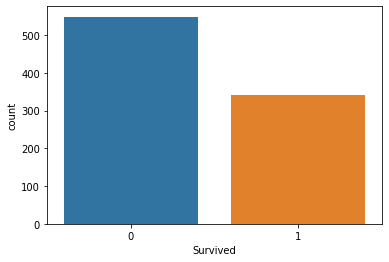

In [ ]:
sns.countplot(titanic[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 891명
* 생존자
    * 생존자의 수는 342명
    * 생존율 0.384
* 사망율이 높은 이유는 무엇일까?

7) 추가 분석해 볼 사항이 있나요?

> * Survived가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② Pclass	

In [39]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1) 변수의 비즈니스 의미

> Ticket class

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [40]:
titanic['Pclass'].isnull().sum()

0

4) 기초통계량(수치화)

In [43]:
pclass_cnt = titanic['Pclass'].value_counts()
pclass_cnt

3    491
1    216
2    184
Name: Pclass, dtype: int64

5) 분포 확인(시각화)

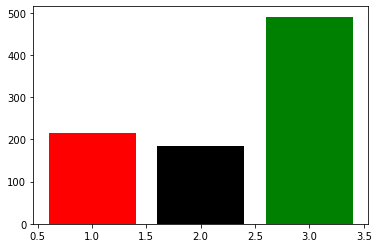

In [45]:
plt.bar(pclass_cnt.index,pclass_cnt.values, color=['g','r','k'])
plt.show()

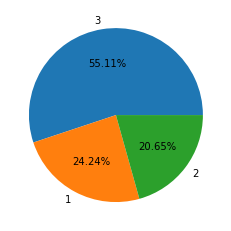

In [53]:
plt.pie(pclass_cnt.values, labels=pclass_cnt.index, autopct='%.2f%%')

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 3등석의 수가 압도적이고, 1,2등석은 자리수가 적다.
- 부자가 아닌 사람들도 많이 타있다.
- 3등석이 많은 것과 생존율이 낮은 것이 관계가 있을지?

7) 추가 분석해 볼 사항이 있나요?

- 등급별 생존율
- 등급별 남녀비율
- 등급별 탑승지역

### ③ Sex

In [55]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1) 변수의 비즈니스 의미

> 성별

2) 숫자, 범주?

> 범주

3) NaN 존재 유무

In [56]:
titanic['Sex'].isnull().sum()

0

4) 기초통계량(수치화)

In [58]:
sex_cnt = titanic['Sex'].value_counts()
sex_cnt

male      577
female    314
Name: Sex, dtype: int64

5) 분포 확인(시각화)

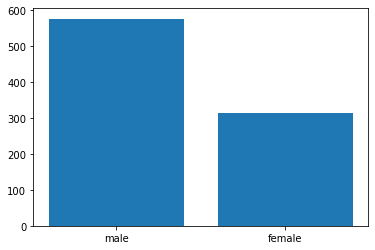

In [59]:
plt.bar(sex_cnt.index, sex_cnt.values)
plt.show()

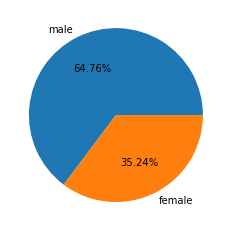

In [60]:
plt.pie(sex_cnt.values, labels=sex_cnt.index, autopct='%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 남성의 숫자가 훨씬 많다.
- 남성이 많은 것과 생존율이 낮은 것이 상관관계가 있을지

7) 추가 분석해 볼 사항이 있나요?

> 상관관계를 확인하는 분석이 필요

### ④ Embarked

In [62]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


1) 변수의 비즈니스 의미

> 탑승지역

2) 숫자, 범주?

>범주

3) NaN 존재 유무

In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
titanic['Embarked'].isnull().sum()

2

In [83]:
titanic.dropna(subset = ['Embarked'], axis=0, inplace=True)

In [84]:
titanic['Embarked'].isnull().sum()

0

4) 기초통계량(수치화)

In [86]:
embarked_cnt = titanic['Embarked'].value_counts()
embarked_cnt

S    644
C    168
Q     77
Name: Embarked, dtype: int64

5) 분포 확인(시각화)

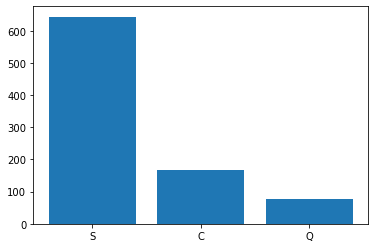

In [87]:
plt.bar(embarked_cnt.index, embarked_cnt.values)
plt.show()

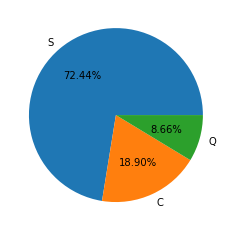

In [88]:
plt.pie(embarked_cnt.values, labels=embarked_cnt.index, autopct='%.2f%%')
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 사우스햄튼 지역에서 탑승한 사람들이 가장 많다.
- 사우스햄튼 지역이 가장 많은 이유는??

7) 추가 분석해 볼 사항이 있나요?

> 사우스햄튼 탑승과 부유층과의 관계  
> 사우스햄튼과 남녀비율과의 관계